[[1 0 0 0 0]
 [0 1 0 0 0]
 [0 0 1 0 0]
 [0 0 0 1 0]
 [0 0 0 0 1]]


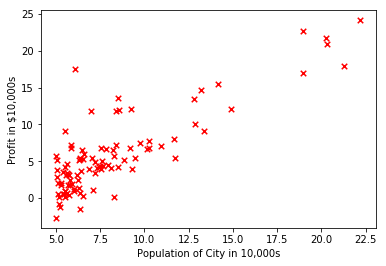



theta result from gradient descent: [[-3.63029144]
 [ 1.16636235]]


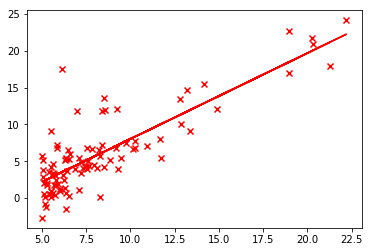

theta result from normal equation: [[-3.89578088]
 [ 1.19303364]]


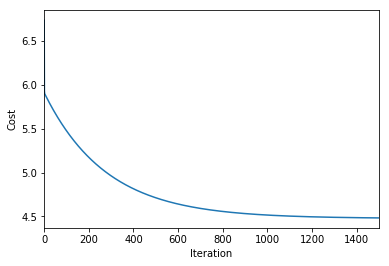

In [25]:
"""This Program Will do Linear Regression on One Variable Data"""
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def normalEquation(X,y):
    return np.dot(np.linalg.pinv(np.dot(X.T,X)),np.dot(X.T,y))

def computeCost(X,y,theta):
    m=len(y)
    temp=np.dot(X,theta)-y
    return np.sum(np.power(temp,2))/(2*m)

def gradientDescent(X,y,iterations,alpha,theta):
    m=len(y)
    J_memo=np.zeros(iterations)
    for i in np.arange(iterations):
        temp=np.dot(X,theta)-y
        temp=np.dot(np.transpose(X),temp)
        theta=theta-((alpha/m)*temp)
        J_memo[i]=computeCost(X,y,theta)
    return theta, J_memo



A=np.eye(5, dtype=int)
print(A)
data=pd.read_csv('ex1data1.txt',header= None)
X=data.iloc[:,0]
y=data.iloc[:,1]
m=len(y)
data.head()
plt.scatter(X,y,c='r',marker='x',s=30)
theta=np.zeros((2,1))
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.show()
X=X[:,np.newaxis]
y=y[:,np.newaxis]
ones=np.ones((m,1))
X=np.hstack((ones,X))
iterations=1500
alpha=0.01
theta,J_cost=gradientDescent(X,y,iterations,alpha,theta)
print('\n')
print('theta results from gradient descent:',theta)
plt.scatter(X[:,1],y,c='r',marker='x')
plt.plot(X[:,1],np.dot(X,theta),c='r')
plt.show()
theta=normalEquation(X,y)
print('theta results from normal equation:',theta)
plt.plot(J_cost)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.xlim(0,iterations)
plt.show()



theta results from gradient descent: [[334302.06399328]
 [ 99411.44947359]
 [  3267.01285407]]


theta results from normal equation: [[340412.65957447]
 [109447.79646964]
 [ -6578.35485416]]


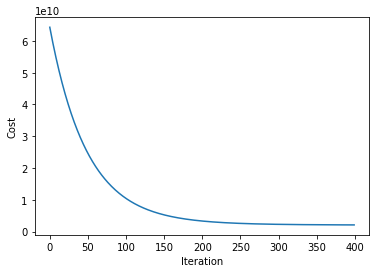

In [26]:
"""This Program Will do Linear Regression on Multi Variable Data"""
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
def normalEquation(X,y):
    return np.dot(np.linalg.pinv(np.dot(X.T,X)),np.dot(X.T,y))

def computeCost(X,y,theta):
    m=len(y)
    temp=np.dot(X,theta)-y
    return np.sum(np.power(temp,2))/(2*m)

def gradientDescent(X,y,iterations,alpha,theta):
    m=len(y)
    J_memo=np.zeros(iterations)
    for i in np.arange(iterations):
        temp=np.dot(X,theta)-y
        temp=np.dot(np.transpose(X),temp)
        theta=theta-((alpha/m)*temp)
        J_memo[i]=computeCost(X,y,theta)
    return theta,J_memo

data=pd.read_csv('ex1data2.txt',sep=',',header=None)
X=data.iloc[:,0:2]
y=data.iloc[:,2]
m=len(y)
ones=np.ones((m,1))
theta=np.zeros((3,1))

X=(X-np.mean(X))/np.std(X)


X=np.hstack((ones,X))
y=y[:,np.newaxis]
iterations=400
alpha=0.01
theta,J_cost=gradientDescent(X,y,iterations,alpha,theta)
print('theta results from gradient descent:',theta)
theta=normalEquation(X,y)
print('\n')
print('theta results from normal equation:', theta)
plt.plot(J_cost)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.show()